In [43]:
import pandas as pd
from scipy.stats import spearmanr
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import spearmanr


In [50]:
df1 = pd.read_csv("REDY.csv")
df1
df1['Price'] = df1['Price'].str.replace(',', '').astype(float)
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2023,1159.58,"1,160.00","1,178.16","1,074.00",53.10M,0.17%
1,01-11-2023,1157.63,"1,077.00","1,160.00","1,049.42",41.36M,7.84%
2,01-10-2023,1073.51,"1,117.38","1,138.95","1,041.11",38.35M,-3.93%
3,01-09-2023,1117.40,"1,126.00","1,168.57","1,082.20",38.01M,-0.37%
4,01-08-2023,1121.57,"1,127.97","1,197.94","1,118.00",69.02M,-0.58%
...,...,...,...,...,...,...,...
67,01-05-2018,387.32,423.28,429,377.4,62.19M,-8.21%
68,01-04-2018,421.97,416,436,410.86,43.52M,1.41%
69,01-03-2018,416.11,440.01,447.98,410.06,42.77M,-7.00%
70,01-02-2018,447.45,445,453.39,401.11,68.25M,0.53%


In [51]:
df2 = pd.read_csv("SUN.csv")
df2
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2023,1259.45,"1,233.05","1,271.95","1,208.55",39.18M,2.74%
1,01-11-2023,1225.85,"1,092.00","1,231.15","1,082.60",36.59M,12.61%
2,01-10-2023,1088.60,"1,159.55","1,161.95","1,068.35",34.32M,-6.05%
3,01-09-2023,1158.65,"1,112.00","1,167.40","1,102.00",42.06M,4.23%
4,01-08-2023,1111.60,"1,143.40","1,169.70","1,100.25",51.15M,-2.78%
...,...,...,...,...,...,...,...
67,01-05-2018,480.35,530,539.3,435,146.17M,-9.09%
68,01-04-2018,528.40,500.9,530.95,496.05,61.96M,6.73%
69,01-03-2018,495.10,537.95,563,492,109.36M,-7.52%
70,01-02-2018,535.35,580,608.95,511.3,182.17M,-7.68%


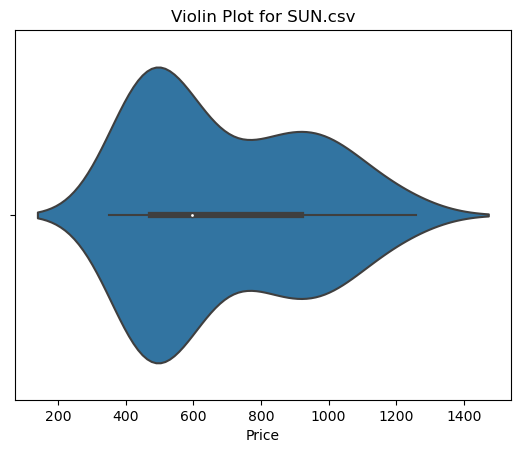

In [87]:
# Violin Plot
sns.violinplot(x=prices)
plt.title(f'Violin Plot for {name}')
plt.xlabel('Price')
plt.show()


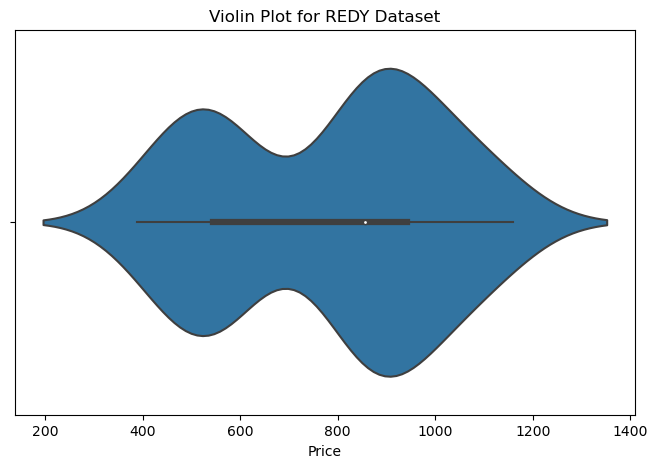

In [88]:
# Violin Plot for REDY
plt.figure(figsize=(8, 5))
sns.violinplot(x=df1['Price'])
plt.title('Violin Plot for REDY Dataset')
plt.xlabel('Price')
plt.show()

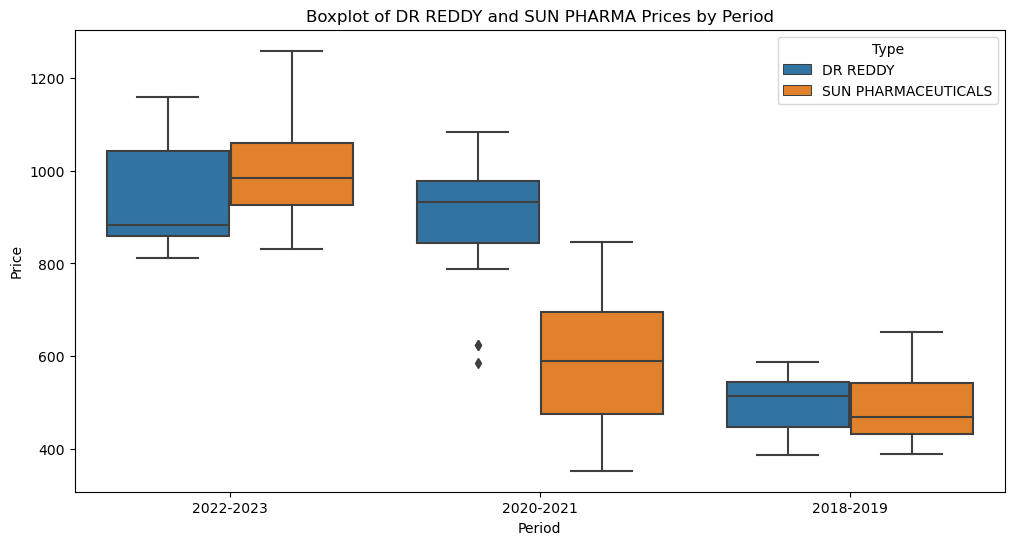

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a period column to label each row by its period
def assign_period(date):
    if pd.Timestamp("2018-01-01") <= date <= pd.Timestamp("2019-12-31"):
        return "2018-2019"
    elif pd.Timestamp("2020-01-01") <= date <= pd.Timestamp("2021-12-31"):
        return "2020-2021"
    elif pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2023-12-31"):
        return "2022-2023"
    else:
        return None

    
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Apply the function to create the period column for both datasets
df1['Period'] = df1['Date'].apply(assign_period)
df2['Period'] = df2['Date'].apply(assign_period)

# Add a column to distinguish between ONGC and Crude Oil data
df1['Type'] = 'DR REDDY'
df2['Type'] = 'SUN PHARMACEUTICALS'
# Combine the data into a single DataFrame
combined_df = pd.concat([df1[['Date', 'Price', 'Period', 'Type']],
                         df2[['Date', 'Price', 'Period', 'Type']]])

# Remove rows with None in Period (if any)
combined_df = combined_df.dropna(subset=['Period'])

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Period', y='Price', hue='Type', data=combined_df)
plt.title("Boxplot of DR REDDY and SUN PHARMA Prices by Period")
plt.ylabel("Price")
plt.xlabel("Period")
plt.legend(title='Type')
plt.show()



In [95]:
# Ensure 'Price' column is numeric in both dataframes
# The errors='coerce' argument will replace invalid parsing with NaN
# Check if df1['Price'] is of type object (string) before applying str.replace
if df1['Price'].dtype == object:  # Check if column type is object (string)
    df1['Price'] = pd.to_numeric(df1['Price'].str.replace(',', ''), errors='coerce')
else:
    # If it's not an object (string), it has likely been already converted to numeric
    df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce') # Handle potential NaNs

# df2['Price'] has already been converted to float in previous step so no need for str.replace
#df2['Price'] = pd.to_numeric(df2['Price'].str.replace(',', ''), errors='coerce') # This is causing issue
# Instead, just handle potential NaNs:
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')

# Perform Shapiro-Wilk test on both datasets
datasets = {'REDY.csv': df1, 'SUN.csv': df2}

for name, df in datasets.items():
    # Apply Shapiro-Wilk test
    # Drop NaN values before applying the test
    stat, p_value = stats.shapiro(df['Price'].dropna())
    print(f"{name} - Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

    # Interpretation
    if p_value > 0.05:
        print(f"{name}: Data is likely normally distributed (p > 0.05).\n")
    else:
        print(f"{name}: Data is likely not normally distributed (p ≤ 0.05).\n")



REDY.csv - Shapiro-Wilk Test Statistic: 0.9199, p-value: 0.0002
REDY.csv: Data is likely not normally distributed (p ≤ 0.05).

SUN.csv - Shapiro-Wilk Test Statistic: 0.9123, p-value: 0.0001
SUN.csv: Data is likely not normally distributed (p ≤ 0.05).



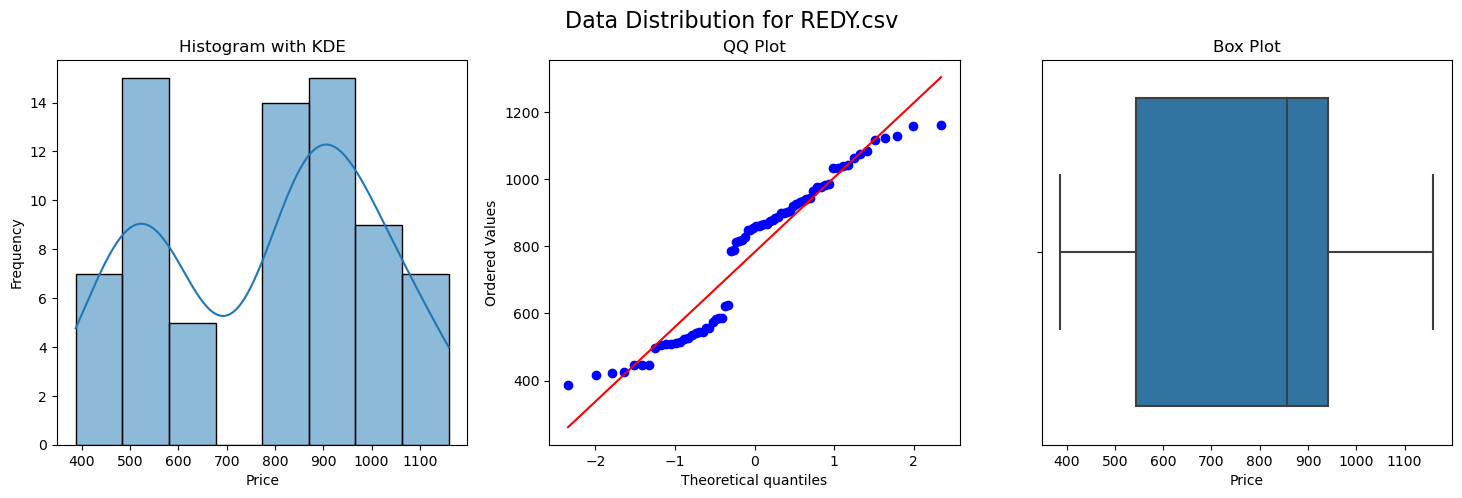

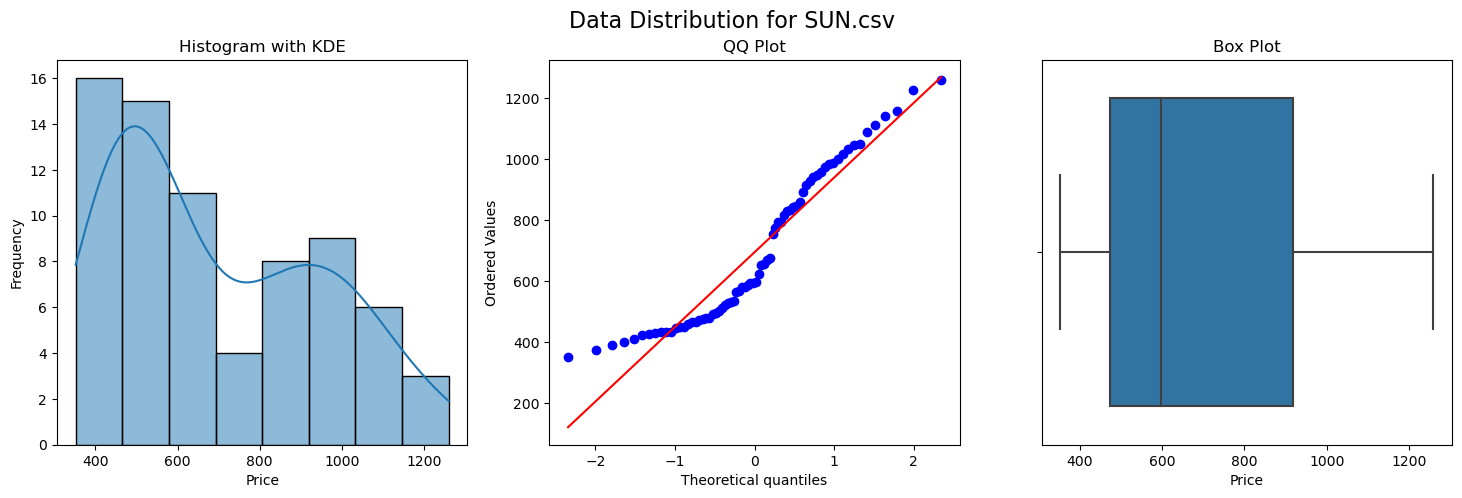

In [96]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv("REDY.csv")
df2 = pd.read_csv("SUN.csv")

# Ensure 'Price' column is numeric in both dataframes
df1['Price'] = pd.to_numeric(df1['Price'].str.replace(',', ''), errors='coerce')
df2['Price'] = pd.to_numeric(df2['Price'].str.replace(',', ''), errors='coerce')

datasets = {'REDY.csv': df1, 'SUN.csv': df2}

for name, df in datasets.items():
    prices = df['Price']

    # Set up figure with multiple subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Data Distribution for {name}', fontsize=16)

    # Histogram with KDE
    sns.histplot(prices, kde=True, ax=axs[0])
    axs[0].set_title('Histogram with KDE')
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Frequency')

    # QQ Plot
    # Ensure prices are numeric before plotting to avoid TypeError.
    # Drop NaN values and convert to numeric
    numeric_prices = pd.to_numeric(prices.dropna(), errors='coerce')
    stats.probplot(numeric_prices, dist="norm", plot=axs[1])
    axs[1].set_title('QQ Plot')

    # Box Plot
    sns.boxplot(x=prices, ax=axs[2])
    axs[2].set_title('Box Plot')
    axs[2].set_xlabel('Price')

    plt.show()

In [97]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load datasets
df1 = pd.read_csv("REDY.csv")
df2 = pd.read_csv("SUN.csv")
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)


# Function to perform Chi-Square Goodness of Fit Test
def chi_square_test(data, dataset_name, bins=5):
    # Convert data to numeric and handle potential errors
    data = pd.to_numeric(data, errors='coerce')

    # Drop NaN values introduced during conversion to ensure all data is numeric.
    data = data.dropna()

    # Create bins and get observed frequencies
    observed_freq, bin_edges = np.histogram(data, bins=bins)

    # Expected frequencies for a uniform distribution
    expected_freq = [len(data) / bins] * bins

    # Perform Chi-Square Goodness of Fit Test
    chi_stat, p_value = stats.chisquare(observed_freq, f_exp=expected_freq)

    print(f"\n{dataset_name} - Chi-Square Goodness of Fit Test:")
    print(f"Chi-Square Statistic: {chi_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Interpretation
    if p_value > 0.05:
        print(f"{dataset_name}: Observed distribution matches expected distribution (p > 0.05).")
    else:
        print(f"{dataset_name}: Observed distribution does not match expected distribution (p ≤ 0.05).")

# Apply Chi-Square test on both datasets
chi_square_test(df1['Price'], 'REDY.csv')
chi_square_test(df2['Price'], 'SUN.csv')


REDY.csv - Chi-Square Goodness of Fit Test:
Chi-Square Statistic: 21.1667
p-value: 0.0003
REDY.csv: Observed distribution does not match expected distribution (p ≤ 0.05).

SUN.csv - Chi-Square Goodness of Fit Test:
Chi-Square Statistic: 18.6944
p-value: 0.0009
SUN.csv: Observed distribution does not match expected distribution (p ≤ 0.05).


Mann-Whitney U Test Statistic: 2033.0000
p-value: 0.0256
Reject the null hypothesis: Significant difference in price distributions between SUN and REDY.


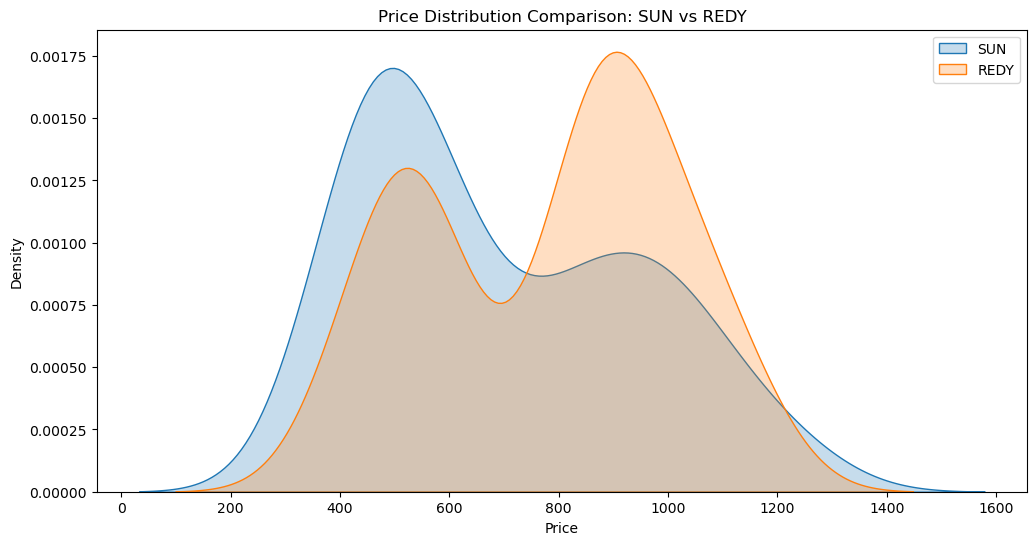

In [77]:
# Load datasets
df_sun = pd.read_csv("SUN.csv")
df_redy = pd.read_csv("REDY.csv")

# Preprocess data to ensure 'Price' column is numeric and 'Date' column is in datetime format
df_sun['Price'] = df_sun['Price'].str.replace(',', '').astype(float)
# Remove commas and convert 'Price' column to float for df_redy
df_redy['Price'] = df_redy['Price'].str.replace(',', '').astype(float) 

prices_sun = df_sun['Price']
prices_redy = df_redy['Price']

# Perform Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(prices_sun, prices_redy, alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject the null hypothesis: No significant difference in price distributions between SUN and REDY.")
else:
    print("Reject the null hypothesis: Significant difference in price distributions between SUN and REDY.")

# Visualization: KDE Plots
plt.figure(figsize=(12, 6))

# Plot KDE for SUN data
sns.kdeplot(prices_sun, label="SUN", fill=True)

# Plot KDE for REDY data
sns.kdeplot(prices_redy, label="REDY", fill=True)

# Labels and Title
plt.title("Price Distribution Comparison: SUN vs REDY")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()

plt.show()


Wilcoxon Test between SUN 2018-2019 and SUN 2020-2021:
Test Statistic: 71.0000, p-value: 0.0229
Result: Reject the null hypothesis (significant difference between SUN 2018-2019 and SUN 2020-2021).

Wilcoxon Test between SUN 2018-2019 and SUN 2022-2023:
Test Statistic: 0.0000, p-value: 0.0000
Result: Reject the null hypothesis (significant difference between SUN 2018-2019 and SUN 2022-2023).

Wilcoxon Test between SUN 2020-2021 and SUN 2022-2023:
Test Statistic: 0.0000, p-value: 0.0000
Result: Reject the null hypothesis (significant difference between SUN 2020-2021 and SUN 2022-2023).

Wilcoxon Test between REDY 2018-2019 and REDY 2020-2021:
Test Statistic: 0.0000, p-value: 0.0000
Result: Reject the null hypothesis (significant difference between REDY 2018-2019 and REDY 2020-2021).

Wilcoxon Test between REDY 2018-2019 and REDY 2022-2023:
Test Statistic: 0.0000, p-value: 0.0000
Result: Reject the null hypothesis (significant difference between REDY 2018-2019 and REDY 2022-2023).

Wilco

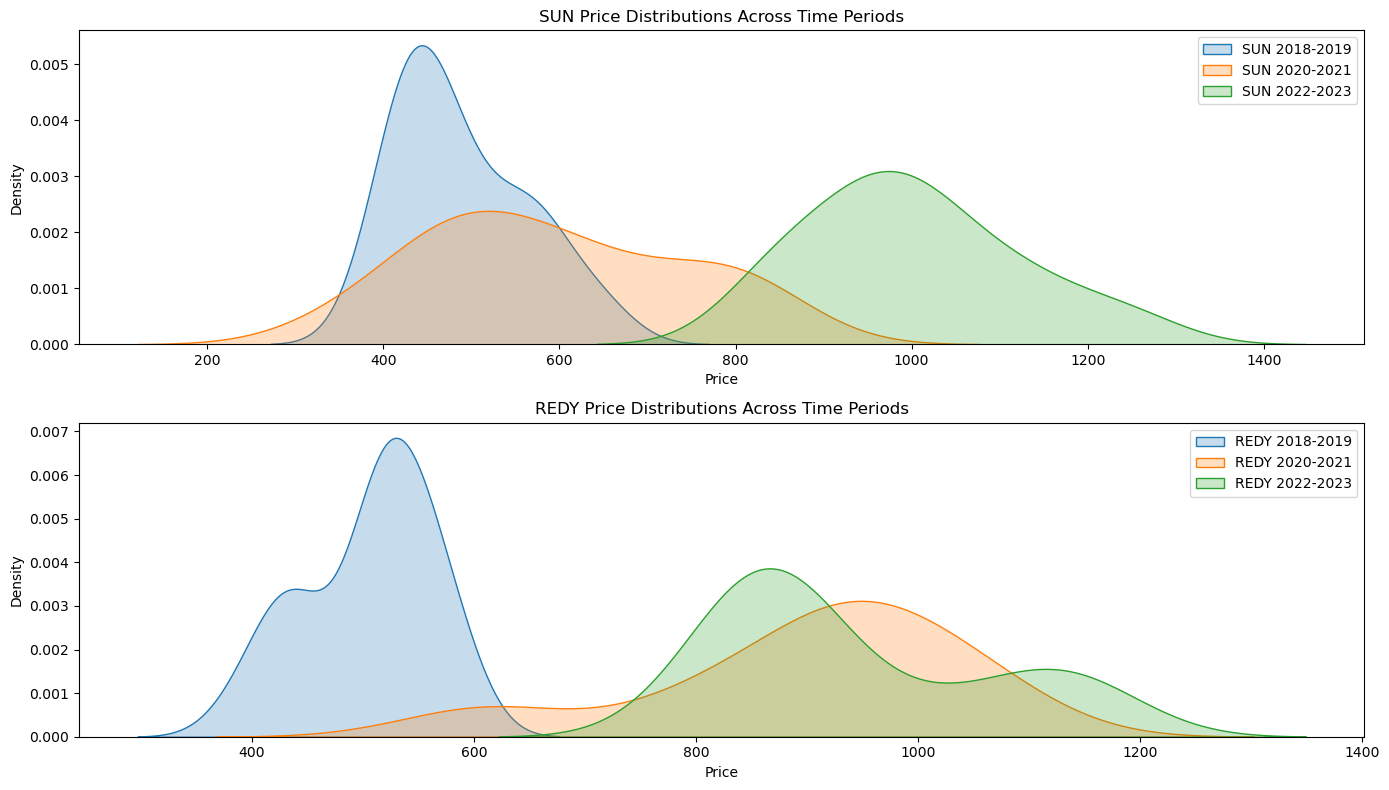

In [78]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sun = pd.read_csv("SUN.csv")
df_redy = pd.read_csv("REDY.csv")

# Preprocess data to ensure 'Price' column is numeric and 'Date' column is in datetime format
df_sun['Price'] = df_sun['Price'].str.replace(',', '').astype(float)
df_sun['Date'] = pd.to_datetime(df_sun['Date'])
# Ensure 'Price' is numeric for df_redy before filtering
df_redy['Price'] = df_redy['Price'].str.replace(',', '').astype(float) # Convert 'Price' to numeric before filtering
df_redy['Date'] = pd.to_datetime(df_redy['Date'])

# Define function for Wilcoxon signed-rank test
def wilcoxon_test(group1, group2, label1, label2):
    # Ensure groups have the same length for paired test
    min_len = min(len(group1), len(group2))
    group1 = group1.iloc[:min_len] # Take only the first min_len elements
    group2 = group2.iloc[:min_len] # Take only the first min_len elements

    stat, p_value = stats.wilcoxon(group1, group2)
    print(f"\nWilcoxon Test between {label1} and {label2}:")
    print(f"Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

    # Interpretation
    if p_value <= 0.05:
        print(f"Result: Reject the null hypothesis (significant difference between {label1} and {label2}).")
    else:
        print(f"Result: Fail to reject the null hypothesis (no significant difference between {label1} and {label2}).")

# Define time period groups for SUN data
sun_2018_2019 = df_sun[(df_sun['Date'].dt.year >= 2018) & (df_sun['Date'].dt.year <= 2019)]['Price']
sun_2020_2021 = df_sun[(df_sun['Date'].dt.year >= 2020) & (df_sun['Date'].dt.year <= 2021)]['Price']
sun_2022_2023 = df_sun[(df_sun['Date'].dt.year >= 2022) & (df_sun['Date'].dt.year <= 2023)]['Price']

# Define time period groups for REDY data
redy_2018_2019 = df_redy[(df_redy['Date'].dt.year >= 2018) & (df_redy['Date'].dt.year <= 2019)]['Price']
redy_2020_2021 = df_redy[(df_redy['Date'].dt.year >= 2020) & (df_redy['Date'].dt.year <= 2021)]['Price']
redy_2022_2023 = df_redy[(df_redy['Date'].dt.year >= 2022) & (df_redy['Date'].dt.year <= 2023)]['Price']

# Perform Wilcoxon signed-rank tests
# SUN data
wilcoxon_test(sun_2018_2019, sun_2020_2021, "SUN 2018-2019", "SUN 2020-2021")
wilcoxon_test(sun_2018_2019, sun_2022_2023, "SUN 2018-2019", "SUN 2022-2023")
wilcoxon_test(sun_2020_2021, sun_2022_2023, "SUN 2020-2021", "SUN 2022-2023")

# REDY data
wilcoxon_test(redy_2018_2019, redy_2020_2021, "REDY 2018-2019", "REDY 2020-2021")
wilcoxon_test(redy_2018_2019, redy_2022_2023, "REDY 2018-2019", "REDY 2022-2023")
wilcoxon_test(redy_2020_2021, redy_2022_2023, "REDY 2020-2021", "REDY 2022-2023")

# Plot distributions of each group
plt.figure(figsize=(14, 8))

# SUN data distributions
plt.subplot(2, 1, 1)
sns.kdeplot(sun_2018_2019, label="SUN 2018-2019", fill=True)
sns.kdeplot(sun_2020_2021, label="SUN 2020-2021", fill=True)
sns.kdeplot(sun_2022_2023, label="SUN 2022-2023", fill=True)
plt.title("SUN Price Distributions Across Time Periods")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()

# REDY data distributions
plt.subplot(2, 1, 2)
sns.kdeplot(redy_2018_2019, label="REDY 2018-2019", fill=True)
sns.kdeplot(redy_2020_2021, label="REDY 2020-2021", fill=True)
sns.kdeplot(redy_2022_2023, label="REDY 2022-2023", fill=True)
plt.title("REDY Price Distributions Across Time Periods")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

Spearman Rank Correlation Coefficient: 0.6372
p-value: 0.0000
There is a significant monotonic relationship between REDY and SUN prices (p ≤ 0.05).


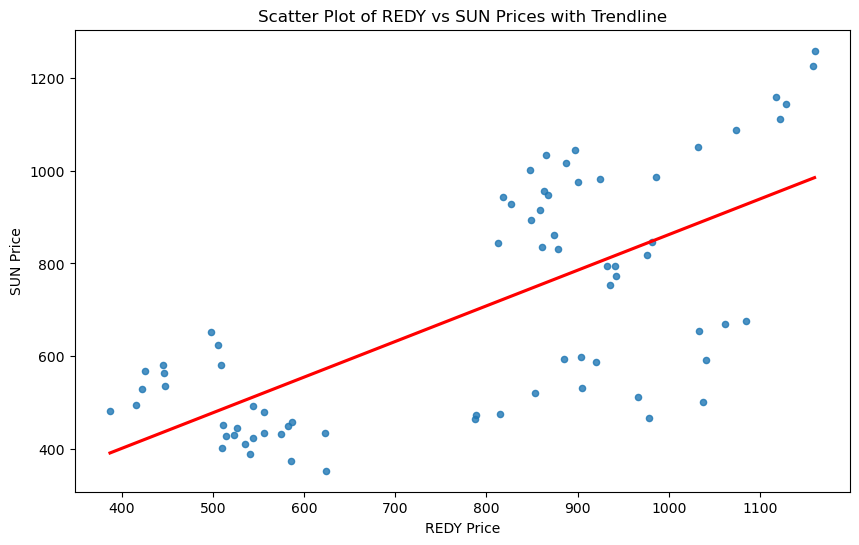

In [79]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df1 = pd.read_csv("REDY.csv")
df2 = pd.read_csv("SUN.csv")

# Ensure 'Price' column is numeric in both datasets
df1['Price'] = df1['Price'].str.replace(',', '').astype(float)
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)

# Align data by index, ensuring both datasets have the same length
# This will truncate the longer dataset to match the shorter one
min_len = min(len(df1), len(df2))
prices_redy = df1['Price'].iloc[:min_len]
prices_sun = df2['Price'].iloc[:min_len]

# Calculate Spearman Rank Correlation
spearman_corr, p_value = stats.spearmanr(prices_redy, prices_sun)

print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("There is no significant monotonic relationship between REDY and SUN prices (p > 0.05).")
else:
    print("There is a significant monotonic relationship between REDY and SUN prices (p ≤ 0.05).")

# Scatter Plot with Trendline for Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=prices_redy, y=prices_sun, scatter_kws={'s': 20}, line_kws={"color": "red"}, ci=None)
plt.xlabel("REDY Price")
plt.ylabel("SUN Price")
plt.title("Scatter Plot of REDY vs SUN Prices with Trendline")
plt.show()


In [94]:
import pandas as pd
from scipy.stats import spearmanr

# Load the ONGC and HPCL data from CSV files or predefined DataFrames
# df1 = pd.read_csv('ongc_data.csv')  # Replace with your actual data file if needed
# df2 = pd.read_csv('hpcl_data.csv')  # Replace with your actual data file if needed

# Ensure dates are in datetime format for easier filtering
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

# Define date ranges for the three time periods
periods = {
    '2018-2019': ('2018-01-01', '2019-12-31'),
    '2020-2021': ('2020-01-01', '2021-12-31'),
    '2022-2023': ('2022-01-01', '2023-12-31')
}

# Function to compute Spearman correlation for each period
def calculate_spearman(df1, df2, period_name, start_date, end_date):
    # Filter data for the given date range
    df1_period = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)]
    df2_period = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]
    
    # Merge data on Date to align ONGC and HPCL prices by date
    merged_data = pd.merge(df1_period[['Date', 'Price']], df2_period[['Date', 'Price']],
                           on='Date', suffixes=('_reddy', '_sun'))
    
    # Calculate Spearman correlation
    correlation, p_value = spearmanr(merged_data['Price_reddy'], merged_data['Price_sun'])
    
    # Interpretation
    significance = "not significant"
    if p_value < 0.05:
        significance = "significant"
    
    # Print results with interpretation
    print(f"{period_name} - Spearman correlation coefficient: {correlation:.4f}, P-value: {p_value:.4f}.")
    print(f"This indicates a {significance} correlation between Sun Pharmaceuticals and Dr. Reddy's Laboratories prices.")

# Apply the function for each time period
for period_name, (start_date, end_date) in periods.items():
    calculate_spearman(df1, df2, period_name, start_date, end_date)


2018-2019 - Spearman correlation coefficient: -0.5643, P-value: 0.0041.
This indicates a significant correlation between Sun Pharmaceuticals and Dr. Reddy's Laboratories prices.
2020-2021 - Spearman correlation coefficient: 0.6009, P-value: 0.0019.
This indicates a significant correlation between Sun Pharmaceuticals and Dr. Reddy's Laboratories prices.
2022-2023 - Spearman correlation coefficient: 0.7948, P-value: 0.0000.
This indicates a significant correlation between Sun Pharmaceuticals and Dr. Reddy's Laboratories prices.


Friedman Test Statistic: 36.3333
p-value: 0.0000
Significant differences exist between the time periods (p ≤ 0.05).


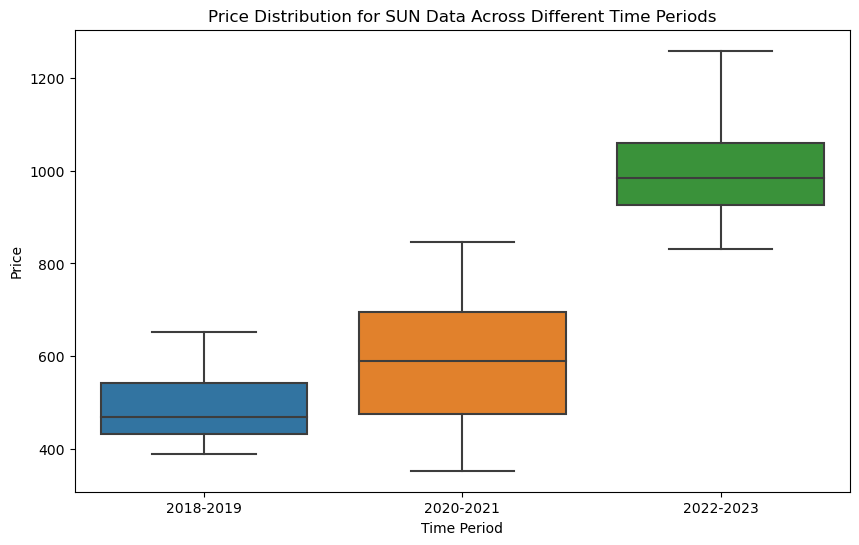

In [80]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load SUN dataset
df = pd.read_csv("SUN.csv")# Ensure 'Price' column is numeric and 'Date' column is in datetime format
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

# Group data into three time periods
group_1 = df[(df['Date'].dt.year >= 2018) & (df['Date'].dt.year <= 2019)]['Price']
group_2 = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2021)]['Price']
group_3 = df[(df['Date'].dt.year >= 2022) & (df['Date'].dt.year <= 2023)]['Price']

# Get the minimum length of the groups
min_len = min(len(group_1), len(group_2), len(group_3))

# Subset the groups to have equal length
group_1 = group_1.sample(n=min_len, random_state=42) # Added random_state for reproducibility
group_2 = group_2.sample(n=min_len, random_state=42)
group_3 = group_3.sample(n=min_len, random_state=42)

# Perform Friedman's test
stat, p_value = stats.friedmanchisquare(group_1, group_2, group_3)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("No significant differences between the time periods (p > 0.05).")
else:
    print("Significant differences exist between the time periods (p ≤ 0.05).")

# Visualization: Box Plot
# Create a DataFrame for plotting
data_for_plotting = pd.DataFrame({
    '2018-2019': group_1,
    '2020-2021': group_2,
    '2022-2023': group_3
})

# Melt the DataFrame for easier plotting with Seaborn
data_melted = data_for_plotting.melt(var_name="Time Period", value_name="Price")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Time Period", y="Price", data=data_melted)
plt.title("Price Distribution for SUN Data Across Different Time Periods")
plt.ylabel("Price")
plt.show()

Friedman Test Statistic: 36.0833
p-value: 0.0000
Significant differences exist between the time periods (p ≤ 0.05).


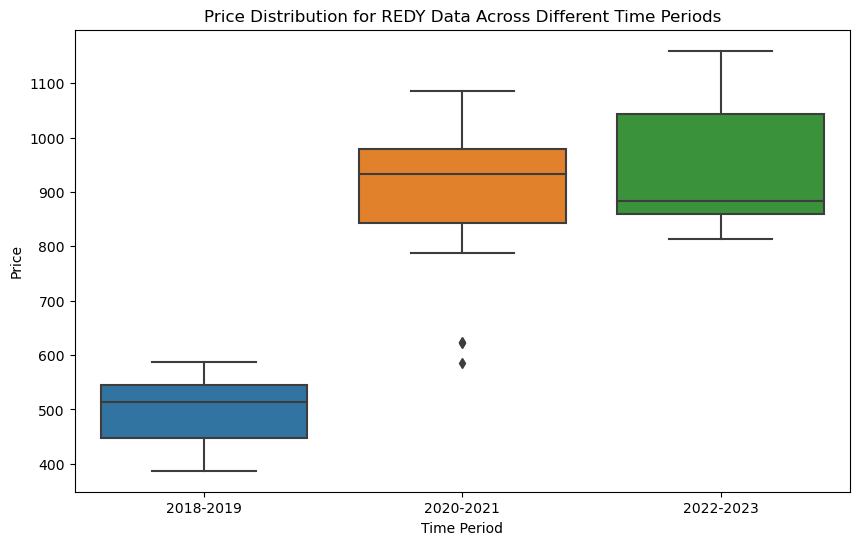

In [81]:
# Load REDY dataset
df_redy = pd.read_csv("REDY.csv")

# Ensure 'Date' column is in datetime format if not already
df_redy['Date'] = pd.to_datetime(df_redy['Date'])

# Convert 'Price' column to numeric, handling commas
# This is the crucial change to fix the ValueError
df_redy['Price'] = df_redy['Price'].str.replace(',', '').astype(float)

# Group data into three time periods based on years
group_1_redy = df_redy[(df_redy['Date'].dt.year >= 2018) & (df_redy['Date'].dt.year <= 2019)]['Price']
group_2_redy = df_redy[(df_redy['Date'].dt.year >= 2020) & (df_redy['Date'].dt.year <= 2021)]['Price']
group_3_redy = df_redy[(df_redy['Date'].dt.year >= 2022) & (df_redy['Date'].dt.year <= 2023)]['Price']

# Get the minimum length of the groups
min_len = min(len(group_1_redy), len(group_2_redy), len(group_3_redy))

# Subset the groups to have equal length using random sampling
group_1_redy = group_1_redy.sample(n=min_len, random_state=42) # Added random_state for reproducibility
group_2_redy = group_2_redy.sample(n=min_len, random_state=42)
group_3_redy = group_3_redy.sample(n=min_len, random_state=42)

# Perform Friedman's test
stat, p_value = stats.friedmanchisquare(group_1_redy, group_2_redy, group_3_redy)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("No significant differences between the time periods (p > 0.05).")
else:
    print("Significant differences exist between the time periods (p ≤ 0.05).")

# Visualization: Box Plot
# Create a DataFrame for plotting
data_for_plotting_redy = pd.DataFrame({
    '2018-2019': group_1_redy,
    '2020-2021': group_2_redy,
    '2022-2023': group_3_redy
})

# Melt the DataFrame for easier plotting with Seaborn
data_melted_redy = data_for_plotting_redy.melt(var_name="Time Period", value_name="Price")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Time Period", y="Price", data=data_melted_redy)
plt.title("Price Distribution for REDY Data Across Different Time Periods")
plt.ylabel("Price")
plt.show()

Kendall's Tau Coefficient: 0.4280
p-value: 0.0000
There is a significant monotonic relationship between REDY and SUN prices (p ≤ 0.05).


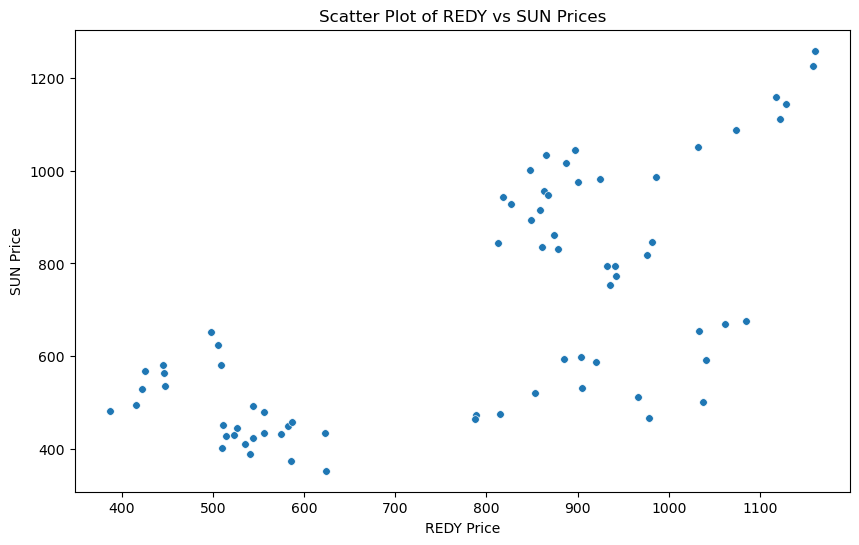

In [82]:
min_len = min(len(df1), len(df2))
prices_redy = df1['Price'].iloc[:min_len]  # Subset to the minimum length
prices_sun = df2['Price'].iloc[:min_len]   # Subset to the minimum length

# Calculate Kendall's Tau Correlation
kendall_tau, p_value = stats.kendalltau(prices_redy, prices_sun)

print(f"Kendall's Tau Coefficient: {kendall_tau:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("There is no significant monotonic relationship between REDY and SUN prices (p > 0.05).")
else:
    print("There is a significant monotonic relationship between REDY and SUN prices (p ≤ 0.05).")

# Scatter Plot for Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prices_redy, y=prices_sun, s=30)
plt.xlabel("REDY Price")
plt.ylabel("SUN Price")
plt.title("Scatter Plot of REDY vs SUN Prices")
plt.show()